In [201]:
import numpy as np

In [202]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [203]:
df=pd.read_csv('energydata_complete.csv')
df.head(10)
df.tail(20)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
19715,5/27/2016 14:50,60,0,25.500000,46.060000,26.350000,41.000000,28.426667,40.590000,24.666667,...,23.100000,46.590000,21.8,755.80,59.000000,2.000000,21.166667,13.4,37.889086,37.889086
19716,5/27/2016 15:00,60,0,25.500000,45.933333,26.277143,41.000000,28.356667,40.560000,24.666667,...,23.100000,46.590000,21.8,755.80,59.000000,2.000000,21.000000,13.3,17.123315,17.123315
19717,5/27/2016 15:10,70,0,25.500000,45.760000,26.200000,41.000000,28.290000,40.433333,24.700000,...,23.133333,46.590000,22.0,755.75,58.333333,2.000000,21.333333,13.3,24.058432,24.058432
19718,5/27/2016 15:20,80,0,25.500000,45.626667,26.171429,41.000000,28.260000,40.260000,24.700000,...,23.133333,46.590000,22.1,755.70,57.666667,2.000000,21.666667,13.3,9.538671,9.538671
19719,5/27/2016 15:30,80,0,25.500000,45.590000,26.100000,41.000000,28.200000,40.126667,24.700000,...,23.166667,46.590000,22.3,755.65,57.000000,2.000000,22.000000,13.3,30.020685,30.020685
19720,5/27/2016 15:40,70,0,25.500000,45.522500,26.100000,41.051429,28.200000,40.200000,24.700000,...,23.100000,46.590000,22.5,755.60,56.333333,2.000000,22.333333,13.2,23.851737,23.851737
19721,5/27/2016 15:50,100,0,25.500000,45.633333,26.080000,41.196000,28.133333,40.260000,24.700000,...,23.200000,46.590000,22.6,755.55,55.666667,2.000000,22.666667,13.2,47.981309,47.981309
19722,5/27/2016 16:00,100,0,25.500000,45.730000,26.000000,41.428571,28.100000,40.433333,24.700000,...,23.200000,46.590000,22.8,755.50,55.000000,2.000000,23.000000,13.2,18.215602,18.215602
19723,5/27/2016 16:10,90,0,25.500000,45.790000,26.000000,41.590000,28.100000,40.560000,24.700000,...,23.160000,46.590000,22.8,755.45,55.000000,2.166667,22.833333,13.2,38.751594,38.751594
19724,5/27/2016 16:20,100,0,25.500000,45.933333,26.000000,41.652857,28.000000,40.700000,24.700000,...,23.200000,46.621429,22.9,755.40,55.000000,2.333333,22.666667,13.3,32.306224,32.306224


In [204]:
df.shape

(19735, 29)

In [205]:
data_description = pd.read_csv('variables description.txt', delimiter='\t')
data_description.head(40)

,Variable Description
0,====================
1,date time year-month-day hour:minute:second
2,"Appliances, energy use in Wh"
3,"lights, energy use of light fixtures in the ho..."
4,"T1, Temperature in kitchen area, in Celsius"
5,"RH_1, Humidity in kitchen area, in %"
6,"T2, Temperature in living room area, in Celsius"
7,"RH_2, Humidity in living room area, in %"
8,"T3, Temperature in laundry room area"
9,"RH_3, Humidity in laundry room area, in %"


In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
date           19735 non-null object
Appliances     19735 non-null int64
lights         19735 non-null int64
T1             19735 non-null float64
RH_1           19735 non-null float64
T2             19735 non-null float64
RH_2           19735 non-null float64
T3             19735 non-null float64
RH_3           19735 non-null float64
T4             19735 non-null float64
RH_4           19735 non-null float64
T5             19735 non-null float64
RH_5           19735 non-null float64
T6             19735 non-null float64
RH_6           19735 non-null float64
T7             19735 non-null float64
RH_7           19735 non-null float64
T8             19735 non-null float64
RH_8           19735 non-null float64
T9             19735 non-null float64
RH_9           19735 non-null float64
T_out          19735 non-null float64
Press_mm_hg    19735 non-null float64
RH_out         19735 n

In [207]:
from datetime import datetime as dt
df['date'] = pd.to_datetime(df['date'])

In [208]:

import datetime
import calendar
df['date']=pd.to_datetime(df['date'])
df['year']=df['date'].dt.year
df['month']=df['date'].dt.month
df['day']=df['date'].dt.day
df['day_of_week']=df['date'].dt.weekday_name
df['time_hr_24']=df['date'].dt.hour
morning=range(6,12)
afternoon=range(12,17)
evening=range(17,22)
def time_slot(x):
    if x in morning:
        return 'morning'
    elif x in afternoon:
        return 'afternoon'
    elif x in evening:
        return 'evening'
    else:
        return 'night'
    
df['day_slot']=df['time_hr_24'].map(time_slot)

week1=range(1,8)
week2=range(8,15)
week3=range(15,22)
week4=range(22,29)

def week_num(x):
    if x in week1:
        return 'week1'
    elif x in week2:
        return 'week2'
    elif x in week3:
        return 'week3'
    elif x in week4:
        return 'week4'
    else:
        return 'week5' 
df['week']=df['day'].map(week_num)
weekend = ['Saturday','Sunday']
def week_day_type(x):
    if x in weekend:
        return 'weekends'
    else:
        return 'weekdays'
df['week_day_type']=df['day_of_week'].map(week_day_type)

 
df.drop(['date'],axis=1,inplace=True)
df=pd.get_dummies(df,prefix=['DOW','TS','WDT','W'],columns=['day_of_week','day_slot','week_day_type','week'])
print(df.shape)
    
df.dtypes

(19735, 50)


Appliances         int64
lights             int64
T1               float64
RH_1             float64
T2               float64
RH_2             float64
T3               float64
RH_3             float64
T4               float64
RH_4             float64
T5               float64
RH_5             float64
T6               float64
RH_6             float64
T7               float64
RH_7             float64
T8               float64
RH_8             float64
T9               float64
RH_9             float64
T_out            float64
Press_mm_hg      float64
RH_out           float64
Windspeed        float64
Visibility       float64
Tdewpoint        float64
rv1              float64
rv2              float64
year               int64
month              int64
day                int64
time_hr_24         int64
DOW_Friday         uint8
DOW_Monday         uint8
DOW_Saturday       uint8
DOW_Sunday         uint8
DOW_Thursday       uint8
DOW_Tuesday        uint8
DOW_Wednesday      uint8
TS_afternoon       uint8


In [200]:
df.day

0        11
1        11
2        11
3        11
4        11
5        11
6        11
7        11
8        11
9        11
10       11
11       11
12       11
13       11
14       11
15       11
16       11
17       11
18       11
19       11
20       11
21       11
22       11
23       11
24       11
25       11
26       11
27       11
28       11
29       11
         ..
19705    27
19706    27
19707    27
19708    27
19709    27
19710    27
19711    27
19712    27
19713    27
19714    27
19715    27
19716    27
19717    27
19718    27
19719    27
19720    27
19721    27
19722    27
19723    27
19724    27
19725    27
19726    27
19727    27
19728    27
19729    27
19730    27
19731    27
19732    27
19733    27
19734    27
Name: day, Length: 19735, dtype: int64

In [198]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df.select_dtypes(include=['float64','int64']))
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df.select_dtypes(include=['float64','int64']), 20))


Top Absolute Correlations
rv1   rv2      1.000000
T6    T_out    0.974778
T7    T9       0.944776
T5    T9       0.911055
T3    T9       0.901324
RH_3  RH_4     0.898978
RH_4  RH_7     0.894301
T1    T3       0.892402
T9    month    0.890605
T4    T9       0.889439
T3    T5       0.888169
T1    T5       0.885247
RH_7  RH_8     0.883984
T7    T8       0.882123
RH_1  RH_4     0.880359
T4    T7       0.877763
T1    T4       0.877001
T4    T5       0.871813
T5    T7       0.870624
T8    T9       0.869338
dtype: float64


In [199]:
df['rv1'].corr(df['rv2'])
df.columns

Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2', 'year', 'month', 'day', 'time_hr_24',
       'DOW_Friday', 'DOW_Monday', 'DOW_Saturday', 'DOW_Sunday',
       'DOW_Thursday', 'DOW_Tuesday', 'DOW_Wednesday', 'TS_afternoon',
       'TS_evening', 'TS_morning', 'TS_night', 'WDT_weekdays', 'WDT_weekends',
       'W_week1', 'W_week2', 'W_week3', 'W_week4', 'W_week5'],
      dtype='object')

In [212]:
phase = df.groupby(['month','day','time_hr_24','DOW_Friday','DOW_Monday','DOW_Saturday','DOW_Sunday','DOW_Thursday',
                    'DOW_Tuesday','DOW_Wednesday','DOW_Friday','TS_morning',
                    'TS_evening','TS_night', 'TS_afternoon']).mean()
phase["Total"]=phase["Appliances"] + phase["lights"]



In [213]:
phase['Total']

month  day  time_hr_24  DOW_Friday  DOW_Monday  DOW_Saturday  DOW_Sunday  DOW_Thursday  DOW_Tuesday  DOW_Wednesday  DOW_Friday  TS_morning  TS_evening  TS_night  TS_afternoon
1      11   17          0           1           0             0           0             0            0              0           0           1           0         0                90.000000
            18          0           1           0             0           0             0            0              0           0           1           0         0               228.333333
            19          0           1           0             0           0             0            0              0           0           1           0         0               198.333333
            20          0           1           0             0           0             0            0              0           0           1           0         0               160.000000
            21          0           1           0             0      

From the above correlation matrix it could be found:
1. rv1 and rv2 are highly correlated.
2. T-out and T6 are highly correlated.
3. T9 and T7 are highly correlated

Thus, one of them must be rejected.

In [214]:
df=df.drop(['rv2','T7','T_out'],axis=1)

In [215]:
from matplotlib import cm as cm

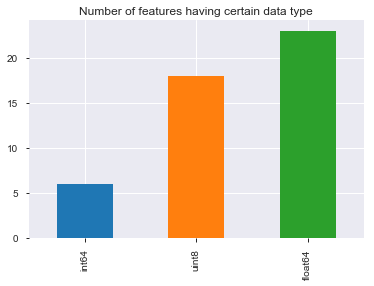

In [217]:
# correlation_matrix(df.select_dtypes(include=['float64','int64']))
df.dtypes.value_counts().sort_values().plot(kind='bar')
plt.title('Number of features having certain data type')
plt.show()

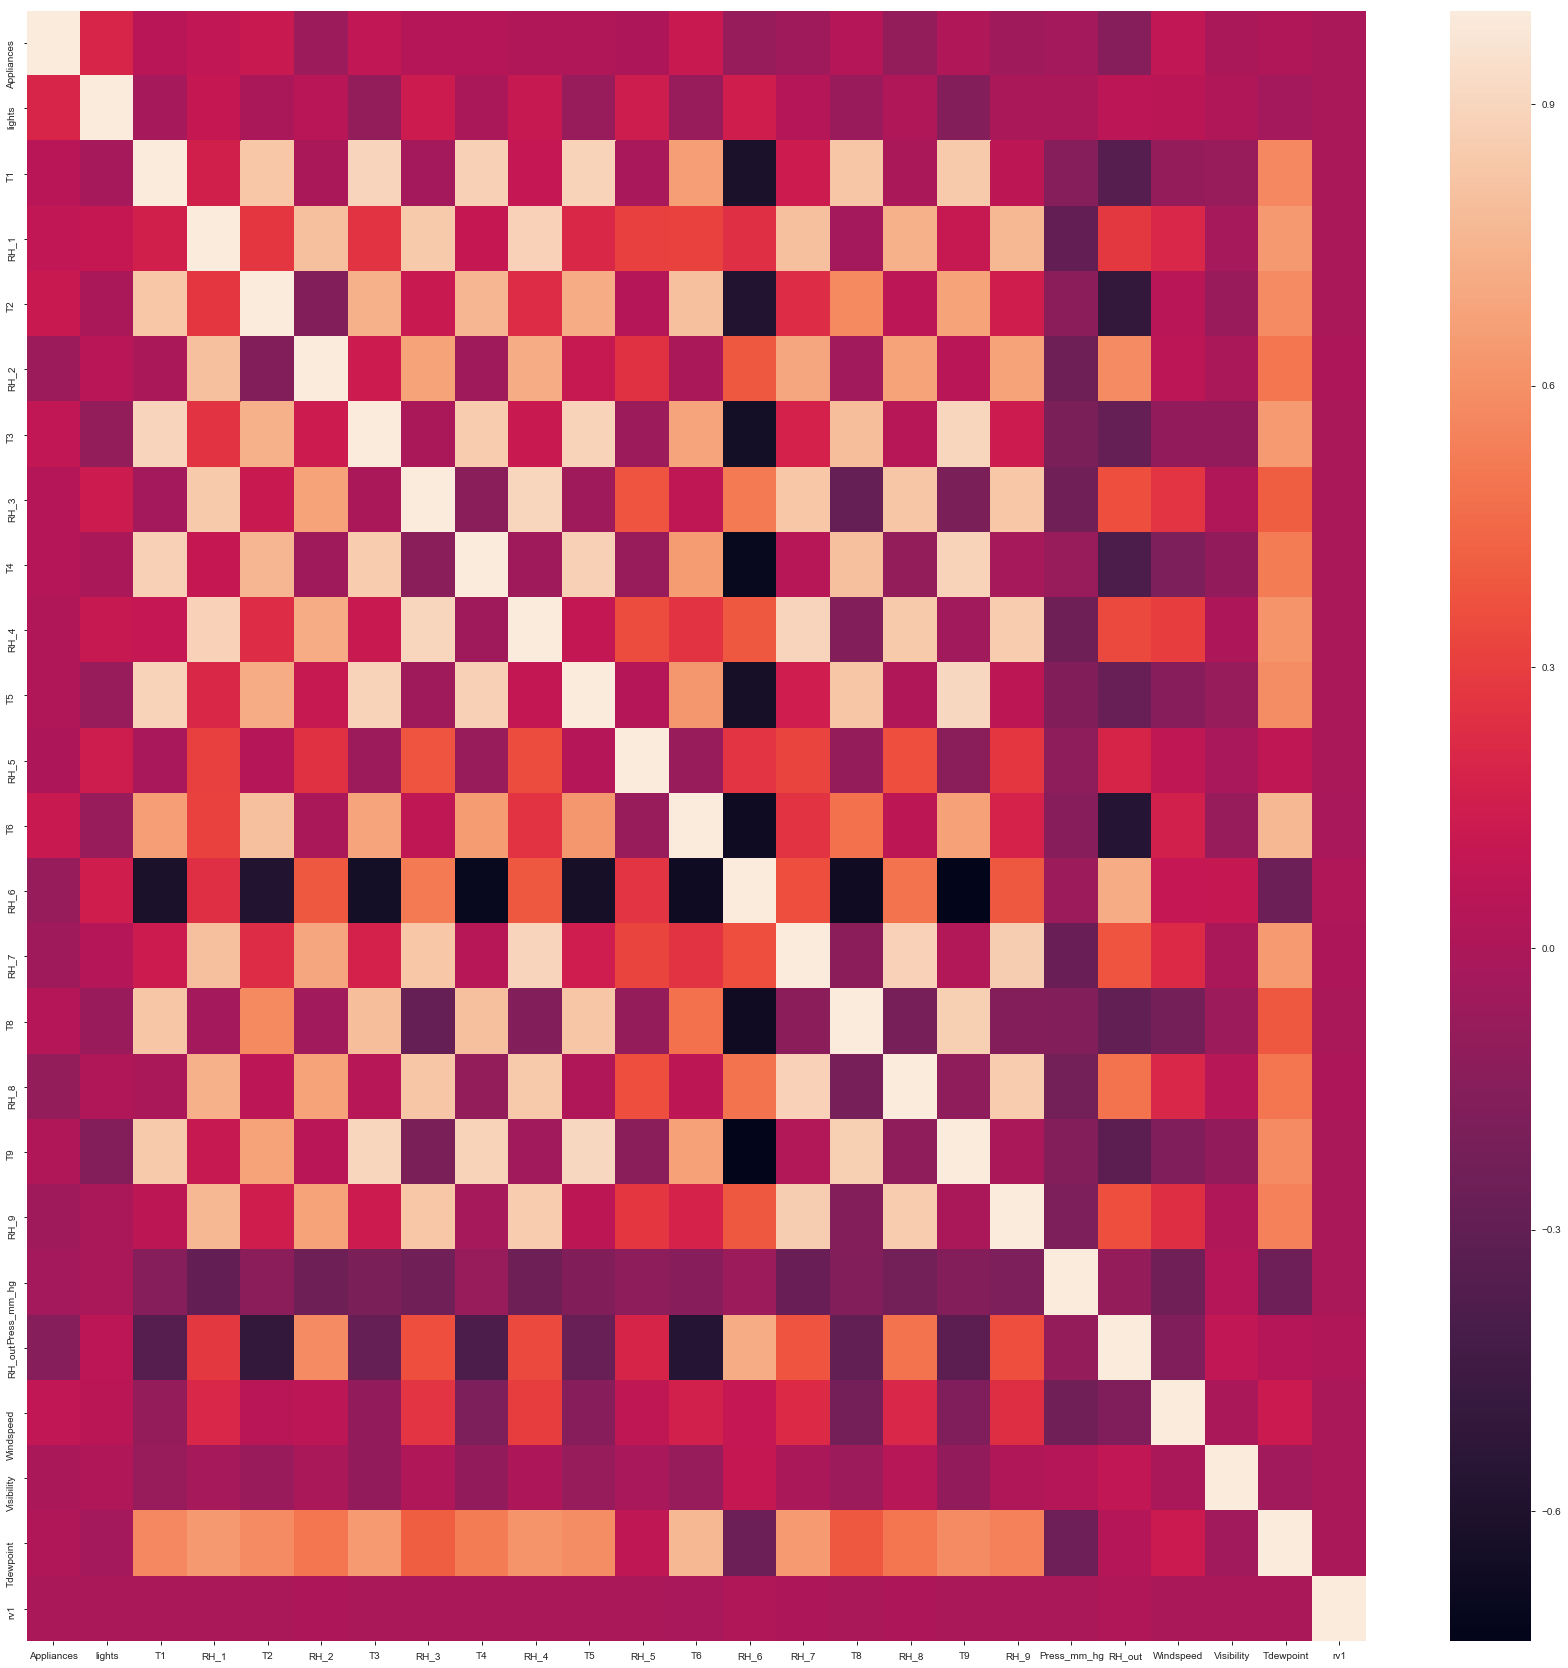

In [126]:
fig = plt.figure(figsize = (30,30))
ax1 = fig.add_subplot(111)
sns.heatmap(df.select_dtypes(include=['float64','int64']).corr())

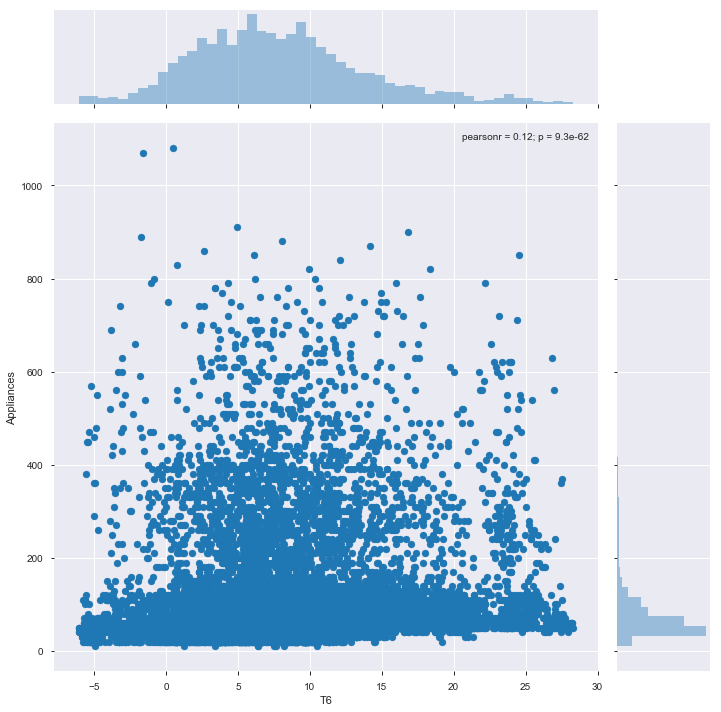

In [127]:
# df['Total_Usage'] = df['Appliances'] + df['lights']
sns.jointplot(x='T6',y='Appliances',data=df,size=10)

In [128]:
df['Appliances'].nunique()

92

In [129]:
# sns.jointplot(x='date',y='Total_Usage',data=df,size=10)

In [130]:
# df['Appliances'].plot(kind='bar')
# plt.title('Frequency of Appliances using Watts')
# plt.legend('Appliances')
# plt.show()

In [131]:
df['Appliances'].value_counts()

50      4368
60      3282
40      2019
70      1560
80      1205
90      1015
100      978
110      736
30       723
120      502
20       343
130      330
140      223
150      144
160       90
260       89
270       87
190       86
240       84
280       82
230       82
180       78
250       77
300       73
220       73
310       70
170       70
290       69
210       69
330       66
        ... 
10         9
700        9
690        9
570        8
710        8
720        7
640        7
650        7
750        7
680        6
740        5
790        4
760        4
780        4
670        4
800        3
730        3
850        2
770        2
820        2
880        1
830        1
910        1
840        1
1080       1
870        1
890        1
900        1
860        1
1070       1
Name: Appliances, Length: 92, dtype: int64

In [132]:
# Here we are dropping T6 because the correlation between T6 and T_out is really high and one of them could be dropped
#df=df.drop(['T6'],axis=1)

In [133]:
# from pandas import Series
# from pandas import DataFrame
# from pandas import TimeGrouper
# from pandas import concat
# date_time=df['date1']
# energy_usage=df['Appliances']
# series = pd.Series(energy_usage, index=date_time)
# one_year = series['2016']
# groups = one_year.groupby(TimeGrouper('M'))
# months = concat([DataFrame(x[1].values) for x in groups], axis=1)
# months = DataFrame(months)
# months.columns = range(1,6)
# months.boxplot()
# pyplot.show()

In [134]:
# from pandas import Series
# from matplotlib import pyplot
# df['date1']=[d.date() for d in df['date']]
# date_time=energy_data_complete['date1']
# energy_usage=df['Appliances']
# series = pd.Series(energy_usage, index=date_time)
# series.plot()
# pyplot.show()
# df['date1']

In [135]:
#df=df.drop(['rv1','rv2'],axis=1)

In [136]:
#df=df.drop(['T7'],axis=1)

In [137]:
df['Appliances'].min()

10

In [138]:
df['Appliances'].max()

1080

In [139]:
df['Appliances'].describe()

count    19735.000000
mean        97.694958
std        102.524891
min         10.000000
25%         50.000000
50%         60.000000
75%        100.000000
max       1080.000000
Name: Appliances, dtype: float64

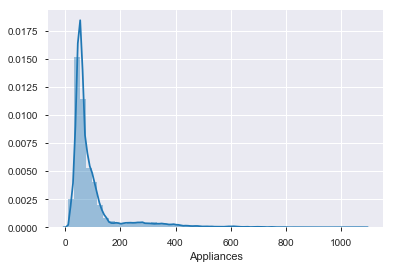

In [140]:
sns.distplot(df['Appliances'])

In [141]:
df.loc[df['Appliances'].idxmax()]

date           2016-01-16 18:50:00
Appliances                    1080
lights                          30
T1                           21.93
RH_1                       42.7667
T2                           21.04
RH_2                         38.08
T3                            20.7
RH_3                       40.6333
T4                           20.89
RH_4                       39.7333
T5                           18.89
RH_5                       51.8817
T6                        0.466667
RH_6                         96.09
RH_7                       37.1843
T8                         20.9267
RH_8                       42.6633
T9                           17.79
RH_9                       40.6725
Press_mm_hg                765.033
RH_out                        85.5
Windspeed                  3.66667
Visibility                      40
Tdewpoint                  -0.0833
rv1                        27.4085
Name: 731, dtype: object

In [142]:
df.loc[df['T6'].idxmax()]

date           2016-05-08 15:40:00
Appliances                      50
lights                           0
T1                         25.1333
RH_1                         37.26
T2                         26.5333
RH_2                       31.5667
T3                            26.2
RH_3                          37.9
T4                              25
RH_4                       36.3267
T5                           23.89
RH_5                          34.9
T6                           28.29
RH_6                             1
RH_7                       33.1943
T8                           24.89
RH_8                       35.3686
T9                            23.1
RH_9                       39.3633
Press_mm_hg                  751.1
RH_out                          33
Windspeed                        4
Visibility                      40
Tdewpoint                      7.1
rv1                        36.1925
Name: 16984, dtype: object

In [143]:
df['month']= df.date.dt.month

In [144]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'RH_7', 'T8', 'RH_8',
       'T9', 'RH_9', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'month'],
      dtype='object')

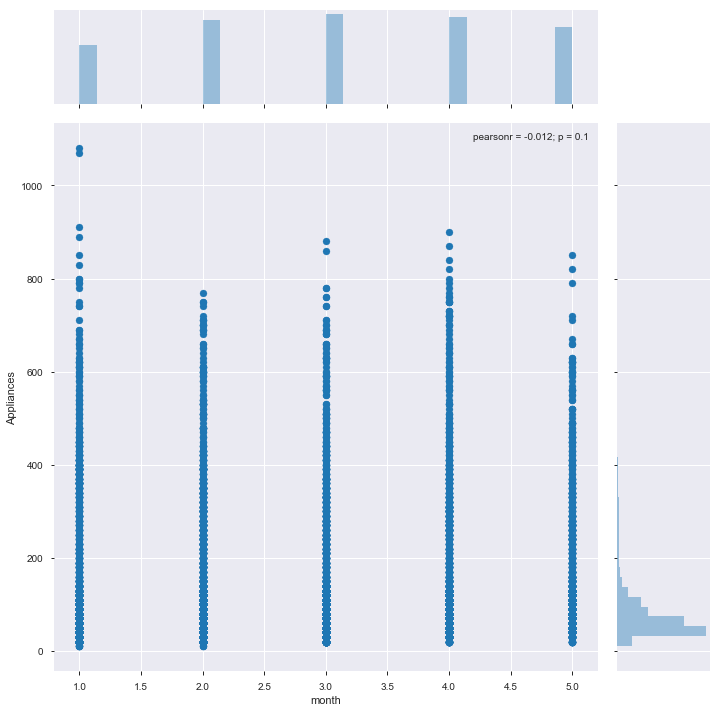

In [145]:
sns.jointplot(x='month',y='Appliances',data=df,size=10)

In [34]:
month_mean_T1=[]
month_mean_T2=[]
month_mean_T3=[]
month_mean_T4=[]
month_mean_T5=[]
month_mean_T6=[]
month_mean_T7=[]
month_mean_T8=[]
month_mean_T9=[]
month_mean_To=[]
month_mean_RH1=[]
month_mean_RH2=[]
month_mean_RH3=[]
month_mean_RH4=[]
month_mean_RH5=[]
month_mean_RH6=[]
month_mean_RH7=[]
month_mean_RH8=[]
month_mean_RH9=[]
month_mean_RHo=[]

In [35]:
for mon in df.month:
    month_mean_T1.append(df[df['month']==mon]['T1'].mean(axis=0))
    month_mean_T2.append(df[df['month']==mon]['T2'].mean(axis=0))
    month_mean_T3.append(df[df['month']==mon]['T3'].mean(axis=0))
    month_mean_T4.append(df[df['month']==mon]['T4'].mean(axis=0))
    month_mean_T5.append(df[df['month']==mon]['T5'].mean(axis=0))
    month_mean_T6.append(df[df['month']==mon]['T6'].mean(axis=0))
    month_mean_T8.append(df[df['month']==mon]['T8'].mean(axis=0))
    month_mean_T9.append(df[df['month']==mon]['T9'].mean(axis=0))
    month_mean_RH1.append(df[df['month']==mon]['RH_1'].mean(axis=0))
    month_mean_RH2.append(df[df['month']==mon]['RH_2'].mean(axis=0))
    month_mean_RH3.append(df[df['month']==mon]['RH_3'].mean(axis=0))
    month_mean_RH4.append(df[df['month']==mon]['RH_4'].mean(axis=0))
    month_mean_RH5.append(df[df['month']==mon]['RH_5'].mean(axis=0))
    month_mean_RH6.append(df[df['month']==mon]['RH_6'].mean(axis=0))
    month_mean_RH7.append(df[df['month']==mon]['RH_7'].mean(axis=0))
    month_mean_RH8.append(df[df['month']==mon]['RH_8'].mean(axis=0))
    month_mean_RH9.append(df[df['month']==mon]['RH_9'].mean(axis=0))
    month_mean_RHo.append(df[df['month']==mon]['RH_out'].mean(axis=0))


    
    

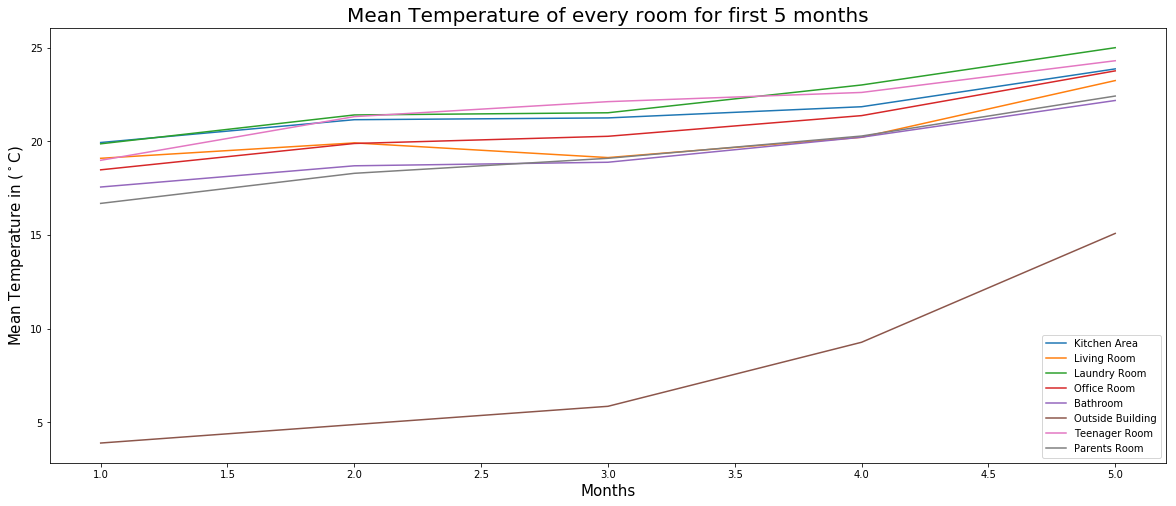

In [36]:
plt.rcParams['figure.figsize'] = (20, 8)
month1=df['month'].unique
month_mean_T1new=month_mean_T1
plt.plot(df['month']  , month_mean_T1 , label = 'Kitchen Area')
plt.plot(df['month'] , month_mean_T2 , label = 'Living Room')
plt.plot(df['month'] , month_mean_T3 , label = 'Laundry Room')
plt.plot(df['month'] , month_mean_T4 , label = 'Office Room')
plt.plot(df['month'] , month_mean_T5 , label = 'Bathroom')
plt.plot(df['month'] , month_mean_T6 , label = 'Outside Building')
plt.plot(df['month'] , month_mean_T8 , label = 'Teenager Room')
plt.plot(df['month'] , month_mean_T9 , label = 'Parents Room')

plt.xlabel("Months" , fontsize=15)
plt.ylabel("Mean Temperature in ($^\circ$C)" , fontsize=15)
plt.title("Mean Temperature of every room for first 5 months" , fontsize=20)
y = ['Jan' , 'Feb' , 'Mar' , 'Apr' , 'May']

plt.legend()
plt.show()

In [37]:
len(month_mean_T2)


19735

In [38]:
df['month'].unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [39]:
unique_month_mean_T2=set(month_mean_T2)
len(unique_month_mean_T2)

5

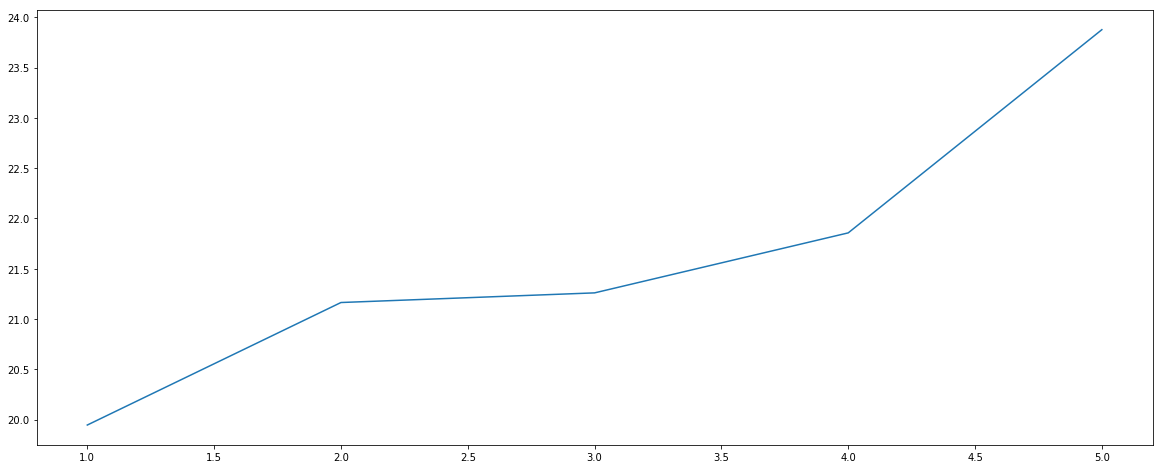

In [40]:
# Energy usage by day
month_mean_T1=[]
for mon in df.month:
    month_mean_T1.append(df[df['month']==mon]['T1'].mean(axis=0))
plt.plot(df['month'] , month_mean_T1 , label = 'Kitchen Area')

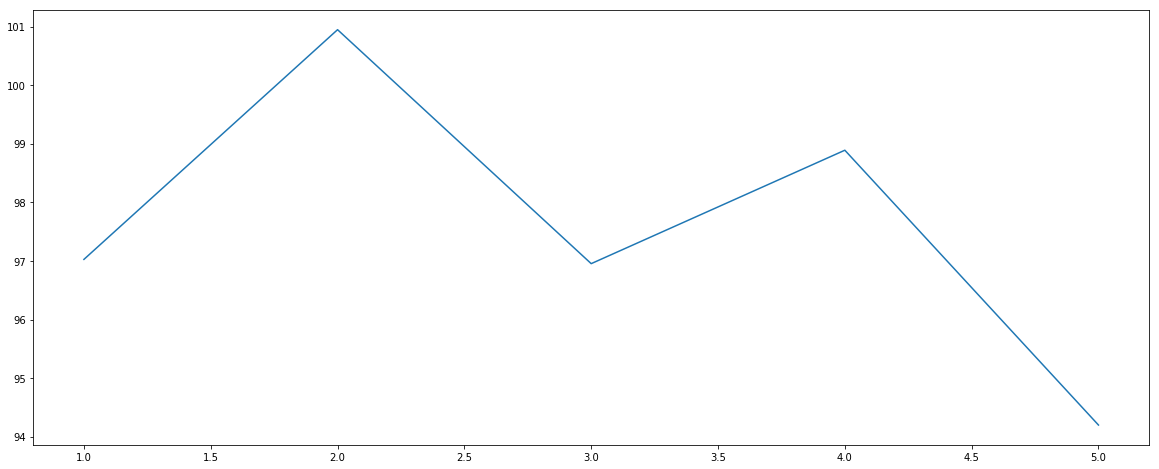

In [43]:
mean_appliances_consumption=[]
for mon in df.month:
    mean_appliances_consumption.append(df[df['month']==mon]['Appliances'].mean(axis=0))
plt.plot(df['month'] , mean_appliances_consumption , label = 'Kitchen Area')

In [44]:
mean_appliances_consumption

[97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,


In [95]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# from sklearn.model_selection import GridSearchCV
# # from sklearn import cross_validation
# from sklearn.model_selection import LeaveOneGroupOut

MAE: 46.77720179102571
MSE: 6825.384903610819
RMSE: 82.61588771907506


Text(0,0.5,'Predicted Y')

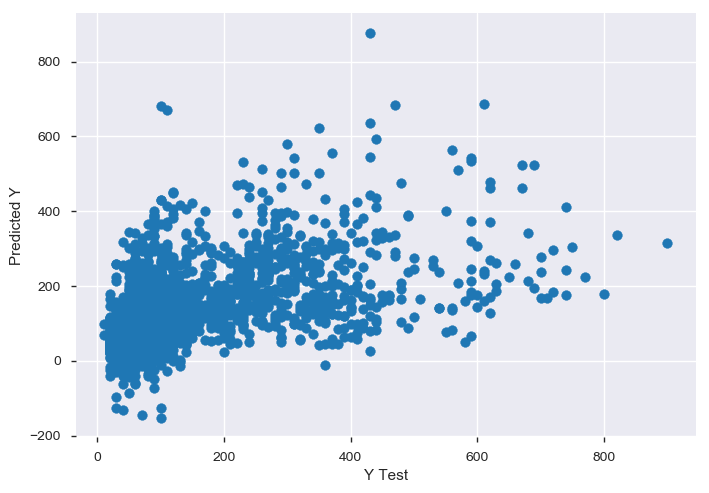

In [96]:
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [97]:
# param_grid={'n_estimators':[300], 
#             'learning_rate': [0.1],# 0.05, 0.02, 0.01], 
#             'max_depth':[6],#4,6], 
#             'min_samples_leaf':[5],#,5,9,17], 
#             'max_features':[1.0] #,0.3]#,0.1]
#            } 
# n_jobs = 7 
# best_est=GradientBoostingHyperParameter(param_grid, n_jobs)

In [98]:
# print("Best Estimator Parameters") 
# print("---------------------------")
# print("n_estimators: %d" %best_est.n_estimators)
# print("max_depth: %d" %best_est.max_depth)
# print("Learning Rate: %.1f" %best_est.learning_rate)
# print("min_samples_leaf: %d" %best_est.min_samples_leaf)
# print("max_features: %.1f" %best_est.max_features) 
# print("Train R-squared: %.2f" %best_est.score(X_train,y_train))
# print("Test R-squared: %.2f" %best_est.score(X_test,y_test))
# print("Train RMSE : %.2f"%sqrt(mean_squared_error(y_train, best_est.predict(X_train))))
# print("Test RMSE : %.2f "%sqrt(mean_squared_error(y_test, best_est.predict(X_test))))

In [99]:
# feat_imp = pd.Series(best_est.feature_importances_,X_train.columns).sort_values(ascending=False)
# feat_imp.plot(kind='bar', title='Feature Importances',figsize = (15,8))
# plt.ylabel('Feature Importance Score')

# Tpot

In [251]:
from tpot import TPOTRegressor
pipeline_optimizer = TPOTRegressor()

In [252]:
pipeline_optimizer = TPOTRegressor(generations=10, population_size=20, cv = 3,
                                    random_state=42, verbosity=2)

In [253]:
pipeline_optimizer.fit(X_train,y_train)

HBox(children=(IntProgress(value=0, description='Optimization Progress', max=220, style=ProgressStyle(description_width='initial')), HTML(value='')))

Generation 1 - Current best internal CV score: -5225.879046662546
Generation 2 - Current best internal CV score: -5225.879046662546
Generation 3 - Current best internal CV score: -5222.948696227385
Generation 4 - Current best internal CV score: -5222.948696227385
Generation 5 - Current best internal CV score: -5222.948696227385
Generation 6 - Current best internal CV score: -5222.948696227385
Generation 7 - Current best internal CV score: -5222.948696227385
Generation 8 - Current best internal CV score: -5222.948696227385
Generation 9 - Current best internal CV score: -5222.948696227385
Generation 10 - Current best internal CV score: -5222.948696227385

Best pipeline: ElasticNetCV(RandomForestRegressor(input_matrix, bootstrap=False, max_features=0.25, min_samples_leaf=1, min_samples_split=2, n_estimators=100), l1_ratio=0.05, tol=0.01)


TPOTRegressor(config_dict=None, crossover_rate=0.1, cv=3,
       disable_update_check=False, early_stop=None, generations=10,
       max_eval_time_mins=5, max_time_mins=None, memory=None,
       mutation_rate=0.9, n_jobs=1, offspring_size=None,
       periodic_checkpoint_folder=None, population_size=20,
       random_state=42, scoring=None, subsample=1.0, use_dask=False,
       verbosity=2, warm_start=False)

In [254]:
energy_data_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 27 columns):
date           19735 non-null datetime64[ns]
Appliances     19735 non-null int64
lights         19735 non-null int64
T1             19735 non-null float64
RH_1           19735 non-null float64
T2             19735 non-null float64
RH_2           19735 non-null float64
T3             19735 non-null float64
RH_3           19735 non-null float64
T4             19735 non-null float64
RH_4           19735 non-null float64
T5             19735 non-null float64
RH_5           19735 non-null float64
T6             19735 non-null float64
RH_6           19735 non-null float64
RH_7           19735 non-null float64
T8             19735 non-null float64
RH_8           19735 non-null float64
T9             19735 non-null float64
RH_9           19735 non-null float64
Press_mm_hg    19735 non-null float64
RH_out         19735 non-null float64
Windspeed      19735 non-null float64
Visibility    

In [255]:
print(pipeline_optimizer.score(X_test, y_test))

-3693.3057863344193
